In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import StratifiedKFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

2024-08-22 20:56:37.947766: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 20:56:37.951738: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 20:56:37.962569: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 20:56:37.979219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 20:56:37.984062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 20:56:37.998223: I tensorflow/core/platform/cpu_feature_gu

In [38]:
# Load the entire dataset into a pandas dataframe

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet')
model_df = pd.read_csv('/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv')

In [39]:
def get_model_data(df, model):
    model_df = df[df['model'] == model]
    model_df = model_df.drop(columns=['model'])
    model_df.drop(columns=['date', 'serial_number'], inplace=True)
    return model_df

In [40]:
# to be enabled later for all datasets and models
for models in model_df['model']:
    final_df = get_model_data(df, models)
    final_df.fillna(final_df.mean(), inplace=True)
    test = final_df.isnull().sum()
    d_col = []
    for k in test.keys():
        if test[k] == final_df.shape[0]:
            d_col.append(k)
    final_df.drop(columns=d_col, inplace=True)

In [36]:
final_df = get_model_data(df, 'ST12000NM0008')

In [44]:
final_df.shape

(5929, 7)

In [45]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(final_df, target = 'failure', session_id = 123, index=False, fix_imbalance = True, remove_outliers = True, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,failure
2,Target type,Binary
3,Original data shape,"(5929, 7)"
4,Transformed data shape,"(9641, 7)"
5,Transformed train set shape,"(7862, 7)"
6,Transformed test set shape,"(1779, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [46]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9964,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0300
et,Extra Trees Classifier,0.9855,0.6721,0.1500,0.0292,0.0486,0.0435,0.0601,0.0770
knn,K Neighbors Classifier,0.9834,0.5373,0.1000,0.0225,0.0367,0.0313,0.0410,0.4200
lightgbm,Light Gradient Boosting Machine,0.9817,0.8506,0.1000,0.0167,0.0286,0.0230,0.0339,29.4330
rf,Random Forest Classifier,0.9814,0.7698,0.1500,0.0211,0.0367,0.0311,0.0490,0.1230
dt,Decision Tree Classifier,0.9800,0.5161,0.0500,0.0143,0.0222,0.0167,0.0194,0.0280
gbc,Gradient Boosting Classifier,0.9759,0.7493,0.1500,0.0183,0.0325,0.0266,0.0441,0.1310
ada,Ada Boost Classifier,0.9318,0.6081,0.1000,0.0038,0.0074,0.0006,0.0046,0.0530
ridge,Ridge Classifier,0.6578,0.5379,0.3500,0.0041,0.0080,0.0009,0.0036,0.0240
lr,Logistic Regression,0.6578,0.5527,0.4000,0.0047,0.0092,0.0021,0.0106,0.5200


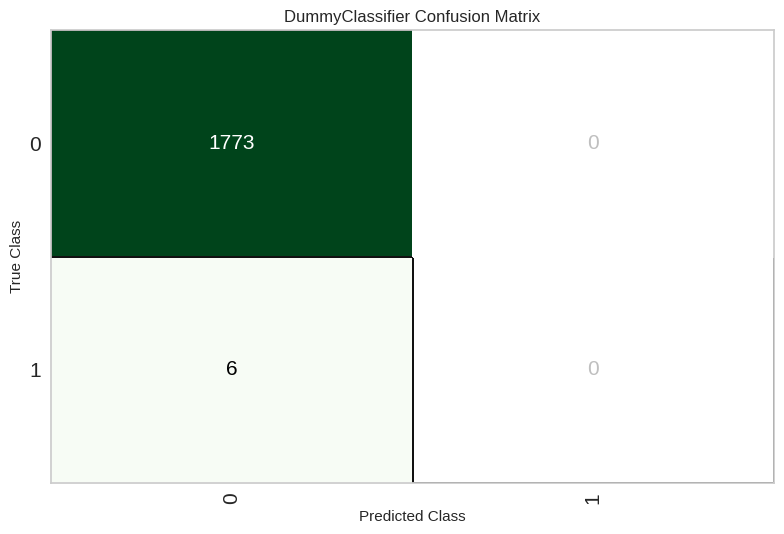

In [48]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

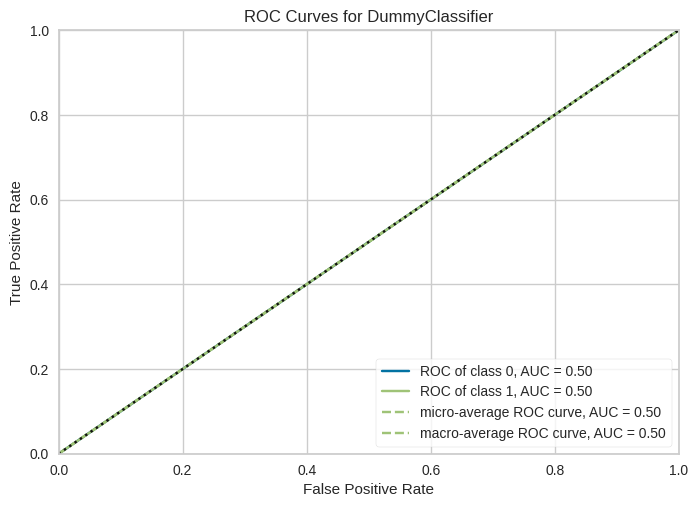

In [49]:
# plot AUC
plot_model(best, plot = 'auc')

In [50]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.9966,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [51]:
holdout_pred.head()

,Reallocated_Sectors_Count,Power-On_Hours,Load_Unload_Cycle,Offline_Uncorrectable,Total_LBAs_Written,Total_LBAs_Read,failure,prediction_label,prediction_score
4150,0.000000,0.143737,0.005698,0.0,0.332956,0.018688,0,0,0.5
4151,0.001923,0.173919,0.000264,0.0,0.540136,0.037570,0,0,0.5
4152,0.000000,0.100498,0.005698,0.0,0.195768,0.008522,0,0,0.5
4153,0.000000,0.299552,0.000153,0.0,0.754341,0.070057,0,0,0.5
4154,0.000000,0.157335,0.000317,0.0,0.475506,0.035572,0,0,0.5
